## Opción 1. Instalando biblioteca graphviz

In [ ]:
#Se requiere instalar graphviz, tanto en el sistema como en el entorno de Python
#pip install graphviz

# En Linux (Debian/Ubuntu): sudo apt-get install graphviz
# En macOS (usando Homebrew): brew install graphviz
# En Windows: Descarga el instalador desde el sitio oficial de Graphviz (https://graphviz.org/download/) y asegúrate de añadirlo al PATH del sistema durante la instalación.
# En Google Colab: Graphviz suele estar preinstalado. Si no, puedes intentar con !apt-get install graphviz -qq en una celda.

Note: you may need to restart the kernel to use updated packages.


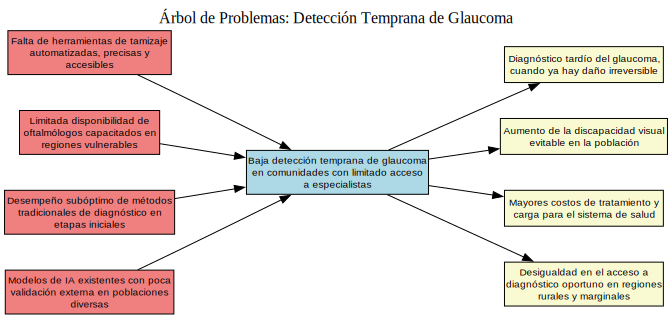

In [ ]:
import graphviz
import textwrap # Para manejar texto largo en los nodos

# --- Árbol de problemas ---
problema_central_txt = "Baja detección temprana de glaucoma en comunidades con limitado acceso a especialistas"

causas_txt = [
    "Falta de herramientas de tamizaje automatizadas, precisas y accesibles",
    "Limitada disponibilidad de oftalmólogos capacitados en regiones vulnerables",
    "Desempeño subóptimo de métodos tradicionales de diagnóstico en etapas iniciales",
    "Modelos de IA existentes con poca validación externa en poblaciones diversas"
]

efectos_txt = [
    "Diagnóstico tardío del glaucoma, cuando ya hay daño irreversible",
    "Aumento de la discapacidad visual evitable en la población",
    "Mayores costos de tratamiento y carga para el sistema de salud",
    "Desigualdad en el acceso a diagnóstico oportuno en regiones rurales y marginales"
]

# --- Configuración del gráfico ---

# Crear un objeto Digraph (Directed Graph)
# 'engine' controla el algoritmo de layout. 'dot' es bueno para jerarquías.
dot = graphviz.Digraph(comment='Árbol de Problemas - Glaucoma', engine='dot')

# Atributos globales del gráfico (opcional)
dot.attr(rankdir='LR',  # Layout de Izquierda a Derecha (Causas -> Problema -> Efectos)
         label='Árbol de Problemas: Detección Temprana de Glaucoma',
         fontsize='16',
         labelloc='t', # Título arriba
         nodesep='0.5', # Espacio entre nodos en el mismo nivel
         ranksep='1')   # Espacio entre niveles (ranks)

# --- Función para ajustar texto largo (evita nodos muy anchos) ---
def wrap_text(text, width=35):
    """Ajusta el texto a un ancho máximo aproximado."""
    return '\n'.join(textwrap.wrap(text, width=width))

# --- Definir nodos y estilos ---

# Estilos comunes para los nodos
node_style_common = {'shape': 'box', 'style': 'filled', 'fontsize': '10', 'fontname': 'Arial'}

# Nodo Central (con un color distintivo)
node_problema_id = 'problema_central'
dot.node(node_problema_id,
         wrap_text(problema_central_txt),
         **node_style_common,
         fillcolor='lightblue')

# Nodos de Causas (con otro color)
for i, causa in enumerate(causas_txt):
    node_causa_id = f'causa_{i+1}'
    dot.node(node_causa_id,
             wrap_text(causa),
             **node_style_common,
             fillcolor='lightcoral')
    # Añadir flecha: Causa -> Problema Central
    dot.edge(node_causa_id, node_problema_id)

# Nodos de Efectos (con otro color)
for i, efecto in enumerate(efectos_txt):
    node_efecto_id = f'efecto_{i+1}'
    dot.node(node_efecto_id,
             wrap_text(efecto),
             **node_style_common,
             fillcolor='lightgoldenrodyellow') # Usando un color diferente
    # Añadir flecha: Problema Central -> Efecto
    dot.edge(node_problema_id, node_efecto_id)

# --- Mostrar el gráfico en el notebook ---
# Simplemente teniendo 'dot' como la última línea en una celda de Jupyter/Colab hará que se muestre automáticamente.
dot

## Opción 2. Instalando biblioteca networkx y matplotlib

In [ ]:
#pip install networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


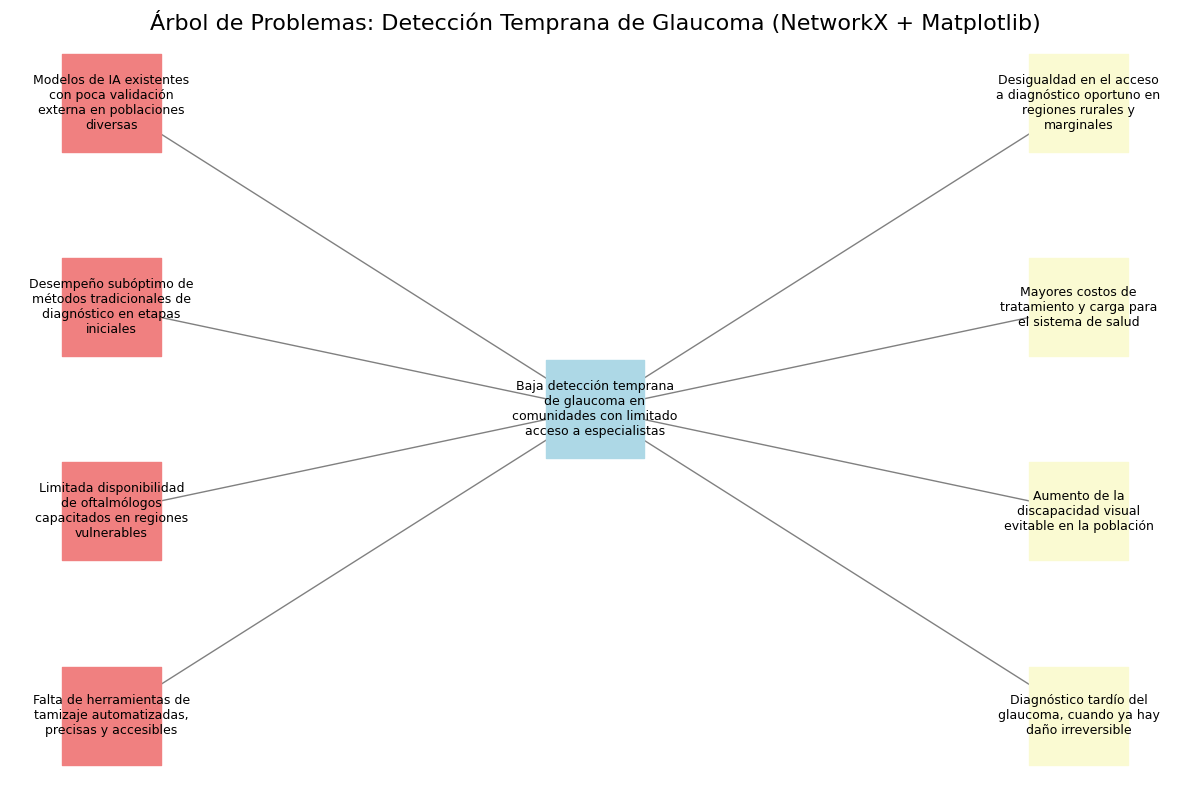

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import textwrap

# --- Árbol de problemas ---
problema_central_txt = "Baja detección temprana de glaucoma en comunidades con limitado acceso a especialistas"

causas_txt = [
    "Falta de herramientas de tamizaje automatizadas, precisas y accesibles",
    "Limitada disponibilidad de oftalmólogos capacitados en regiones vulnerables",
    "Desempeño subóptimo de métodos tradicionales de diagnóstico en etapas iniciales",
    "Modelos de IA existentes con poca validación externa en poblaciones diversas"
]

efectos_txt = [
    "Diagnóstico tardío del glaucoma, cuando ya hay daño irreversible",
    "Aumento de la discapacidad visual evitable en la población",
    "Mayores costos de tratamiento y carga para el sistema de salud",
    "Desigualdad en el acceso a diagnóstico oportuno en regiones rurales y marginales"
]

# --- Función para ajustar texto largo ---
def wrap_text(text, width=25):
    """Ajusta el texto a un ancho máximo aproximado para matplotlib."""
    return '\n'.join(textwrap.wrap(text, width=width))

# --- Crear el grafo dirigido con NetworkX ---
G = nx.DiGraph()

# Añadir nodos con etiquetas ajustadas
node_problema = 'Problema\nCentral' # Usar ID corto para el nodo
G.add_node(node_problema, label=wrap_text(problema_central_txt))

causa_nodes = []
for i, causa in enumerate(causas_txt):
    node_id = f'Causa_{i+1}'
    causa_nodes.append(node_id)
    G.add_node(node_id, label=wrap_text(causa))
    G.add_edge(node_id, node_problema) # Flecha Causa -> Problema

efecto_nodes = []
for i, efecto in enumerate(efectos_txt):
    node_id = f'Efecto_{i+1}'
    efecto_nodes.append(node_id)
    G.add_node(node_id, label=wrap_text(efecto))
    G.add_edge(node_problema, node_id) # Flecha Problema -> Efecto

# --- Dibujar el grafo con Matplotlib ---

# Intentar un layout jerárquico (multipartite) puede ayudar
pos = {}
node_width_factor = 2 # Ajusta según sea necesario para espaciar
node_height_factor = 1.5

# Colocar causas a la izquierda
for i, node in enumerate(causa_nodes):
    pos[node] = (-1 * node_width_factor, i * node_height_factor)

# Colocar problema en el centro
# Calcular una posición y central verticalmente respecto a causas/efectos
mid_y_causas = (len(causa_nodes) - 1) * node_height_factor / 2 if causa_nodes else 0
mid_y_efectos = (len(efecto_nodes) - 1) * node_height_factor / 2 if efecto_nodes else 0
pos[node_problema] = (0, max(mid_y_causas, mid_y_efectos)) # Ponerlo en el centro vertical

# Colocar efectos a la derecha
for i, node in enumerate(efecto_nodes):
    pos[node] = (1 * node_width_factor, i * node_height_factor)


# Extraer etiquetas de los atributos del nodo
labels = nx.get_node_attributes(G, 'label')

# Definir colores
color_map = []
for node in G:
    if node == node_problema:
        color_map.append('lightblue')
    elif 'Causa' in node:
        color_map.append('lightcoral')
    elif 'Efecto' in node:
        color_map.append('lightgoldenrodyellow')
    else:
        color_map.append('grey')

plt.figure(figsize=(12, 8)) # Ajusta el tamaño del gráfico

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=5000, node_color=color_map, node_shape='s') # 's' for square/box

# Dibujar las aristas (flechas)
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', arrowsize=20, edge_color='gray')

# Dibujar las etiquetas
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_family='sans-serif')

plt.title("Árbol de Problemas: Detección Temprana de Glaucoma (NetworkX + Matplotlib)", fontsize=16)
plt.axis('off') # Ocultar ejes
plt.tight_layout() # Ajusta para evitar solapamientos (a veces ayuda)
plt.show()

## Opción 3. Usando la librería pyvis

In [6]:
#pip install pyvis networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pyvis]━━━━━━━━━━━━ 2/3 [pyvis]
Note: you may need to restart the kernel to use updated packages.


In [11]:
import networkx as nx # Pyvis puede usar NetworkX para crear el grafo
from pyvis.network import Network
import textwrap
import os # Para asegurar que el archivo HTML se guarde donde quieres

# --- Tus datos del árbol de problemas ---
problema_central_txt = "Baja detección temprana de glaucoma en comunidades con limitado acceso a especialistas"

causas_txt = [
    "Falta de herramientas de tamizaje automatizadas, precisas y accesibles",
    "Limitada disponibilidad de oftalmólogos capacitados en regiones vulnerables",
    "Desempeño subóptimo de métodos tradicionales de diagnóstico en etapas iniciales",
    "Modelos de IA existentes con poca validación externa en poblaciones diversas"
]

efectos_txt = [
    "Diagnóstico tardío del glaucoma, cuando ya hay daño irreversible",
    "Aumento de la discapacidad visual evitable en la población",
    "Mayores costos de tratamiento y carga para el sistema de salud",
    "Desigualdad en el acceso a diagnóstico oportuno en regiones rurales y marginales"
]

# --- Crear el grafo con Pyvis ---

# Crear objeto Network. 'notebook=True' es clave para Jupyter/Colab.
# height/width controlan el tamaño del frame de visualización.
# heading añade un título al HTML.
net = Network(notebook=True, directed=True, height='750px', width='100%',
              bgcolor='#ffffff', font_color='black', heading='Árbol de Problemas: Detección Temprana de Glaucoma (Pyvis)')

# Función para ajustar texto (para la etiqueta visible)
def wrap_label(text, width=30):
    # Pyvis usa '\\n' o simplemente '\n' para saltos de línea en la etiqueta visible.
    # Vamos a usar '\n' que es más estándar en Python y suele funcionar.
    return '\n'.join(textwrap.wrap(text, width=width))

# Añadir nodo central
net.add_node('problema_central',
             label=wrap_label(problema_central_txt),
             title=problema_central_txt, # Tooltip al pasar el mouse
             color='lightblue',
             shape='box')

# Añadir nodos de causas y aristas
for i, causa in enumerate(causas_txt):
    node_id = f'causa_{i+1}'
    net.add_node(node_id,
                 label=wrap_label(causa),
                 title=causa,
                 color='lightcoral',
                 shape='box')
    net.add_edge(node_id, 'problema_central')

# Añadir nodos de efectos y aristas
for i, efecto in enumerate(efectos_txt):
    node_id = f'efecto_{i+1}'
    net.add_node(node_id,
                 label=wrap_label(efecto),
                 title=efecto,
                 color='lightgoldenrodyellow',
                 shape='box')
    net.add_edge('problema_central', node_id)

# --- Configurar físicas (opcional, para mejorar layout) ---
net.set_options("""
var options = {
  "physics": {
    "enabled": true,
    "hierarchicalRepulsion": {
      "centralGravity": 0.0,
      "springLength": 200,
      "springConstant": 0.01,
      "nodeDistance": 150,
      "damping": 0.09
    },
    "minVelocity": 0.75,
    "solver": "hierarchicalRepulsion"
  },
  "layout": {
     "hierarchical": {
       "enabled": false,
       "direction": "LR",
       "sortMethod": "directed"
     }
  }
}
""")


# --- Mostrar el gráfico ---
# Guarda el gráfico como un archivo HTML y lo muestra en la salida del notebook (esto funciona en Jupyter/Colab, no en scripts normales)
file_name = 'arbol_problemas_glaucoma.html'
#net.show(file_name)

# En local, mostrar un enlace al archivo por si la incrustación falla
print(f"Gráfico interactivo generado: {os.path.abspath(file_name)}")

Gráfico interactivo generado: /Users/gome33773/Library/Mobile Documents/com~apple~CloudDocs/Documents/Courses/MIIA/MIAA-ICESI-ProyectoIA/notebooks/arbol_problemas_glaucoma.html


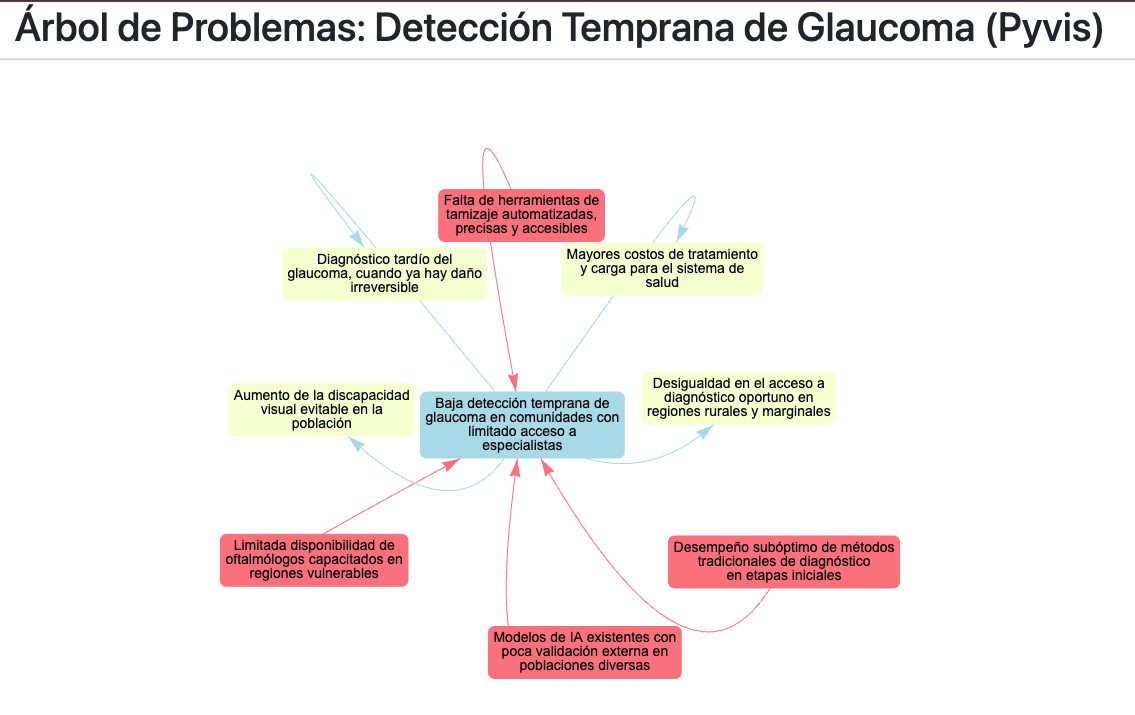